In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,classification_report,cohen_kappa_score
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix

C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv('expense.csv')
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Expense
0,39,Self-emp-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,50,United-States,>50K
1,20,Private,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,40,United-States,<=50K
2,50,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,65,United-States,>50K
3,38,State-gov,HS-grad,9,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,>50K
4,23,Local-gov,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Female,0,0,60,United-States,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             5000 non-null   int64 
 1   workclass       5000 non-null   object
 2   education       5000 non-null   object
 3   education-num   5000 non-null   int64 
 4   marital-status  5000 non-null   object
 5   occupation      5000 non-null   object
 6   relationship    5000 non-null   object
 7   race            5000 non-null   object
 8   sex             5000 non-null   object
 9   capital-gain    5000 non-null   int64 
 10  capital-loss    5000 non-null   int64 
 11  hours-per-week  5000 non-null   int64 
 12  native-country  5000 non-null   object
 13  Expense         5000 non-null   object
dtypes: int64(5), object(9)
memory usage: 547.0+ KB


In [4]:
data.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Expense           0
dtype: int64

In [5]:
data = pd.get_dummies(data,drop_first = True,dtype = int)

In [6]:
data.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 11th',
       'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th',
       'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm',
       'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate',
       'education_ HS-grad', 'education_ Masters', 'education_ Preschool',
       'education_ Prof-school', 'education_ Some-college',
       'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occup

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x = data.drop(columns = ['Expense_ >50K'])
y = data['Expense_ >50K']

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.7,stratify = y,random_state = 2)

In [10]:
def model_validation(model,xtrain,ytrain,xtest,ytest):
    global m
    m = model
    m.fit(xtrain,ytrain)
    pred = m.predict(xtest) #hard prediction(0,1)
    prob = m.predict_proba(xtest)[:,1]  #soft prediction(probablity of 1)
    
    print('Accuracy:',accuracy_score(ytest,pred))
    print('Confusion Matrix:\n',confusion_matrix(ytest,pred))
    print('Report:\n',classification_report(ytest,pred))
    print('Cohen Kappa Score:',cohen_kappa_score(ytest,pred))
    
    fpr,tpr,thres = roc_curve(ytest,prob)
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],color = 'red')
    plt.title(f'AUC SCORE {roc_auc_score(ytest,prob)}')

Accuracy: 0.8406666666666667
Confusion Matrix:
 [[1061   72]
 [ 167  200]]
Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1133
           1       0.74      0.54      0.63       367

    accuracy                           0.84      1500
   macro avg       0.80      0.74      0.76      1500
weighted avg       0.83      0.84      0.83      1500

Cohen Kappa Score: 0.5275758645954679


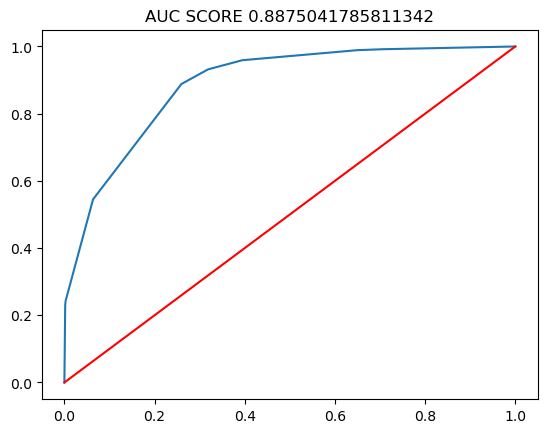

In [11]:
model_validation(DecisionTreeClassifier(criterion='entropy',max_depth = 4),
                x_train,y_train,x_test,y_test)

In [12]:
pd.DataFrame({'Features': x.columns,'Importances':m.feature_importances_})

,Features,Importances
0,age,0.046785
1,education-num,0.171886
2,capital-gain,0.245632
3,capital-loss,0.033243
4,hours-per-week,0.000000
...,...,...
92,native-country_ Thailand,0.000000
93,native-country_ Trinadad&Tobago,0.000000
94,native-country_ United-States,0.000000
95,native-country_ Vietnam,0.000000


In [13]:
param_grid = {'criterion':['entropy','gini'],
             'min_samples_split':[2,5,10,20,30],
             'max_depth':[3,5,7]}

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
gscv = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param_grid,
                   scoring = 'f1',
                   cv= 3)

In [16]:
gscv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 5, 10, 20, 30]},
             scoring='f1')

In [17]:
gscv.best_score_

0.6162872726705216

In [18]:
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}

Accuracy: 0.8406666666666667
Confusion Matrix:
 [[1061   72]
 [ 167  200]]
Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1133
           1       0.74      0.54      0.63       367

    accuracy                           0.84      1500
   macro avg       0.80      0.74      0.76      1500
weighted avg       0.83      0.84      0.83      1500

Cohen Kappa Score: 0.5275758645954679


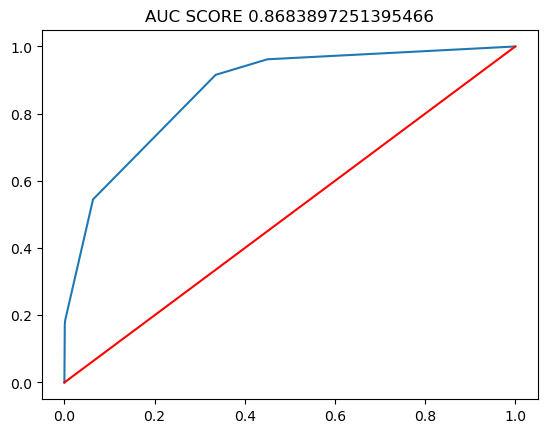

In [19]:
model_validation(DecisionTreeClassifier(**gscv.best_params_),
                x_train,y_train,x_test,y_test)

Accuracy: 0.81
Confusion Matrix:
 [[1130    3]
 [ 282   85]]
Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1133
           1       0.97      0.23      0.37       367

    accuracy                           0.81      1500
   macro avg       0.88      0.61      0.63      1500
weighted avg       0.84      0.81      0.76      1500

Cohen Kappa Score: 0.3081494332489626


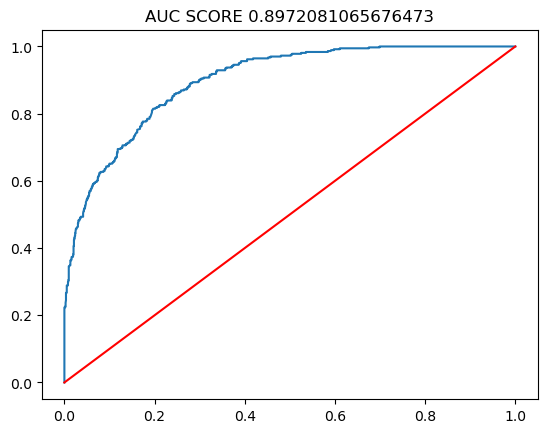

In [20]:
model_validation(RandomForestClassifier(max_depth=4),
                x_train,y_train,x_test,y_test)

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier

Accuracy: 0.822
Confusion Matrix:
 [[976 157]
 [110 257]]
Report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88      1133
           1       0.62      0.70      0.66       367

    accuracy                           0.82      1500
   macro avg       0.76      0.78      0.77      1500
weighted avg       0.83      0.82      0.83      1500

Cohen Kappa Score: 0.5383945119083844


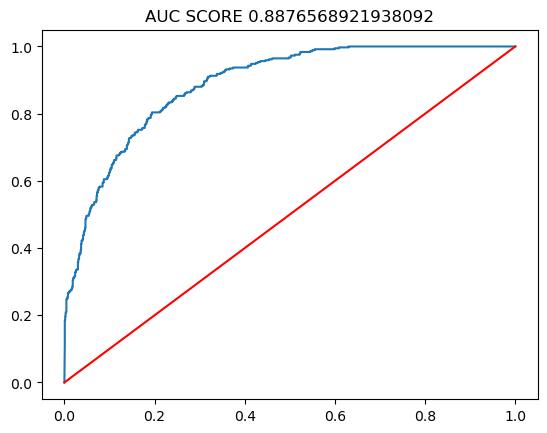

In [22]:
model_validation(BaggingClassifier(estimator=GaussianNB(),n_estimators=100),
                x_train,y_train,x_test,y_test)

In [23]:
from sklearn.ensemble import AdaBoostClassifier

Accuracy: 0.8686666666666667
Confusion Matrix:
 [[1065   68]
 [ 129  238]]
Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92      1133
           1       0.78      0.65      0.71       367

    accuracy                           0.87      1500
   macro avg       0.83      0.79      0.81      1500
weighted avg       0.86      0.87      0.86      1500

Cohen Kappa Score: 0.6235170009784736


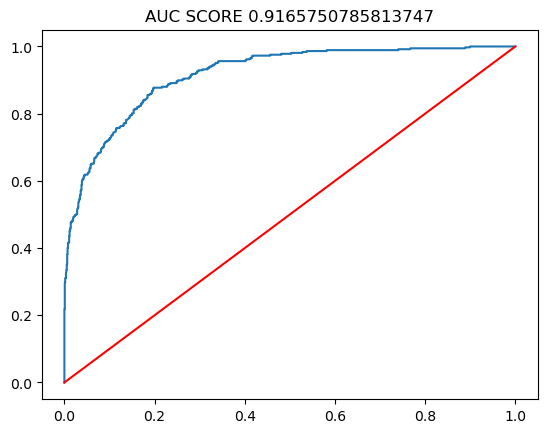

In [24]:
model_validation(AdaBoostClassifier(n_estimators=200),x_train,y_train,x_test,y_test)

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

Accuracy: 0.866
Confusion Matrix:
 [[1073   60]
 [ 141  226]]
Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      1133
           1       0.79      0.62      0.69       367

    accuracy                           0.87      1500
   macro avg       0.84      0.78      0.80      1500
weighted avg       0.86      0.87      0.86      1500

Cohen Kappa Score: 0.6082258282482822


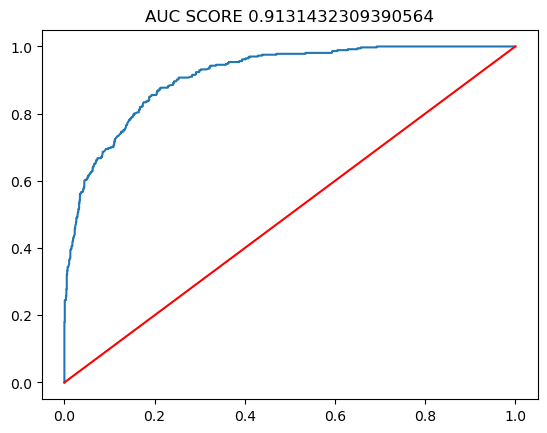

In [26]:
model_validation(GradientBoostingClassifier(n_estimators=100),x_train,y_train,x_test,y_test)

In [27]:
param = {'learning_rate':[0.1,0.05,0.01,0.005,0.001],
        'n_estimators':[50,60,75,100],
        'max_depth':[2,3,4,5]}

In [28]:
gscv = GridSearchCV(estimator=GradientBoostingClassifier(),
                   scoring='f1_macro',
                   param_grid = param,cv = 3)

In [29]:
gscv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.01, 0.005, 0.001],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [50, 60, 75, 100]},
             scoring='f1_macro')

In [30]:
gscv.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

In [31]:
gscv.best_score_

0.7910414460199472

Accuracy: 0.866
Confusion Matrix:
 [[1058   75]
 [ 126  241]]
Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      1133
           1       0.76      0.66      0.71       367

    accuracy                           0.87      1500
   macro avg       0.83      0.80      0.81      1500
weighted avg       0.86      0.87      0.86      1500

Cohen Kappa Score: 0.619585240664382


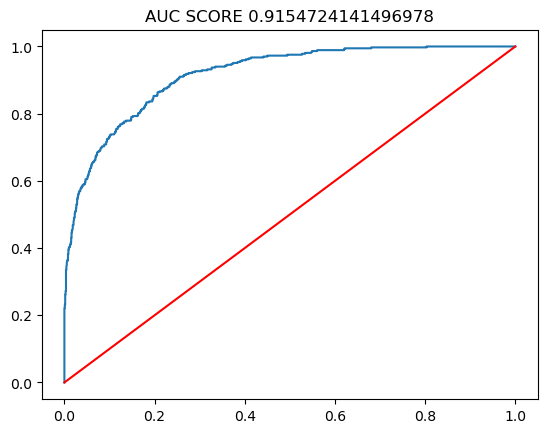

In [32]:
model_validation(GradientBoostingClassifier(**gscv.best_params_),x_train,y_train,x_test,y_test)

In [33]:
xgb = XGBClassifier(n_estimators = 50,eta = 1,gamma=3,reg_lambda=0)

Accuracy: 0.852
Confusion Matrix:
 [[1051   82]
 [ 140  227]]
Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      1133
           1       0.73      0.62      0.67       367

    accuracy                           0.85      1500
   macro avg       0.81      0.77      0.79      1500
weighted avg       0.85      0.85      0.85      1500

Cohen Kappa Score: 0.5769784830677063


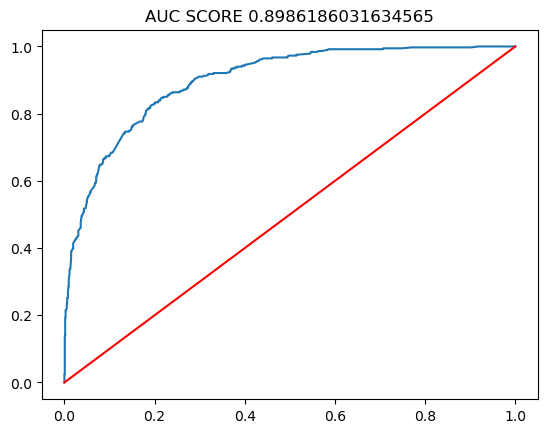

In [34]:
model_validation(xgb,x_train,y_train ,x_test,y_test)

In [35]:
param = {'n_estimators':[20,50,70,100,150,180,200],
        'eta':[2,1,0,0.5,0.1,0.05],
        'max_depth':[3,5,7,9,11,13]}

In [36]:
gscv = GridSearchCV(estimator=XGBClassifier(),
                   param_grid=param,
                   scoring='f1_macro',
                   cv= 3,
                   verbose = 1)

In [37]:
gscv.fit(x_train,y_train)

Fitting 3 folds for each of 252 candidates, totalling 756 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'eta': [2, 1, 0, 0.5, 0.1, 0.05],
                         'max_depth': [3, 5, 7, 9, 11, 13],
                         'n_estimators': [20, 50, 70, 100, 150, 180, 200]},
             scoring='f1_macro', verbose=1)

In [38]:
gscv.best_params_

{'eta': 0.1, 'max_depth': 5, 'n_estimators': 180}

Accuracy: 0.868
Confusion Matrix:
 [[1063   70]
 [ 128  239]]
Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      1133
           1       0.77      0.65      0.71       367

    accuracy                           0.87      1500
   macro avg       0.83      0.79      0.81      1500
weighted avg       0.86      0.87      0.86      1500

Cohen Kappa Score: 0.6227105389522787


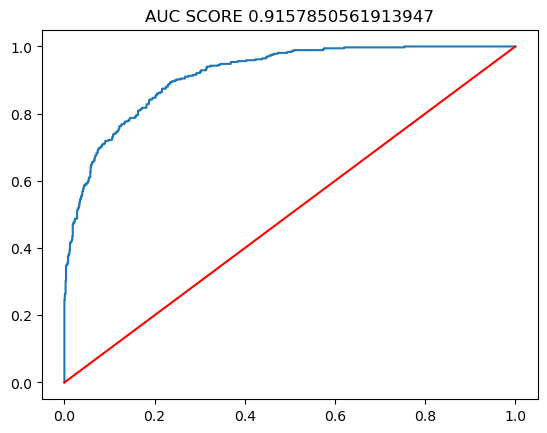

In [39]:
model_validation(XGBClassifier(**gscv.best_params_),x_train,y_train ,x_test,y_test)

In [42]:
model = XGBClassifier(**gscv.best_params_)

In [43]:
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=180,
              n_jobs=None, num_parallel_tree=None, ...)

In [44]:
pred = model.predict(x_test)
prob = model.predict_proba(x_test)[:,1]

In [57]:
from sklearn.metrics import f1_score
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1133
           1       0.77      0.65      0.71       367

    accuracy                           0.87      1500
   macro avg       0.83      0.79      0.81      1500
weighted avg       0.86      0.87      0.86      1500

